# Init

In [41]:
import os
import cv2
import math
import cmath
import time
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class Image:
    def __init__(self):
        self.img=""
    def read_local_img(self,path,val=0):
        self.img = cv2.imread(path)
        if(val==0):
            self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    def bgr_to_rgb(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    def grayscale(self):
        self.img = cv2.imread(self.img, cmap="gray")
    def print_img(self,fig_size=[0,0],axis_bool=False):
        if fig_size != [0,0]:
            plt.figure(figsize = [fig_size[0],fig_size[1]])
        plt.imshow(self.img)
        if(axis_bool==False):
            plt.axis('off')
        plt.show()

In [43]:
class Subplot:
    def __init__(self):
        self.x=1
        self.y=1
        self.fig=[16,16]
        self.arr=1
        self.tot=1
        self.tit=[]

    def print_img_subplot(self,x,y,fi,tot,arr,tit,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        self.tit=tit
        fig = plt.figure(figsize=(self.fig[0],self.fig[0]))
        for i in range(0,self.tot):
            ax = fig.add_subplot(self.x,self.y,1+i)
            ax.imshow(arr[i],cmap='gray')
            ax.title.set_text(self.tit[i])
            if(axis_bool==False):
                ax.axis('off')

    def print_img_subplot2(self,x,y,fi,tot,arr,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        f, axarr = plt.subplots(x,y)
        for i in range(0,tot):
            axarr[i//x,i%y].imshow(arr[i])
            



# Question 7

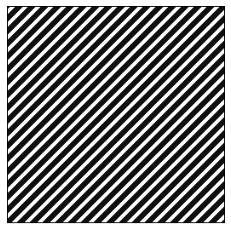

In [44]:
stripe = Image()
stripe.read_local_img("../images/stripe1.jpg")
stripe.img=cv2.cvtColor(stripe.img, cv2.COLOR_BGR2GRAY)
plt.imshow(stripe.img,cmap='gray')
plt.axis('off')
plt.show()

In [45]:
def dft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            val=0.0
            for k in range(0,img.shape[0]):
                for l in range(0,img.shape[1]):
                    val+=img[k,l]*cmath.exp(-2j*math.pi*(k*i/img.shape[0]+l*j/img.shape[1]))
            arr[i][j]=val
    return arr

def idft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            val=0.0
            for k in range(0,img.shape[0]):
                for l in range(0,img.shape[1]):
                    val+=img[k,l]*cmath.exp(2j*math.pi*(k*i/img.shape[0]+l*j/img.shape[1]))
            arr[i][j]=val/img.shape[0]/img.shape[1]
    return arr
    

## part 1

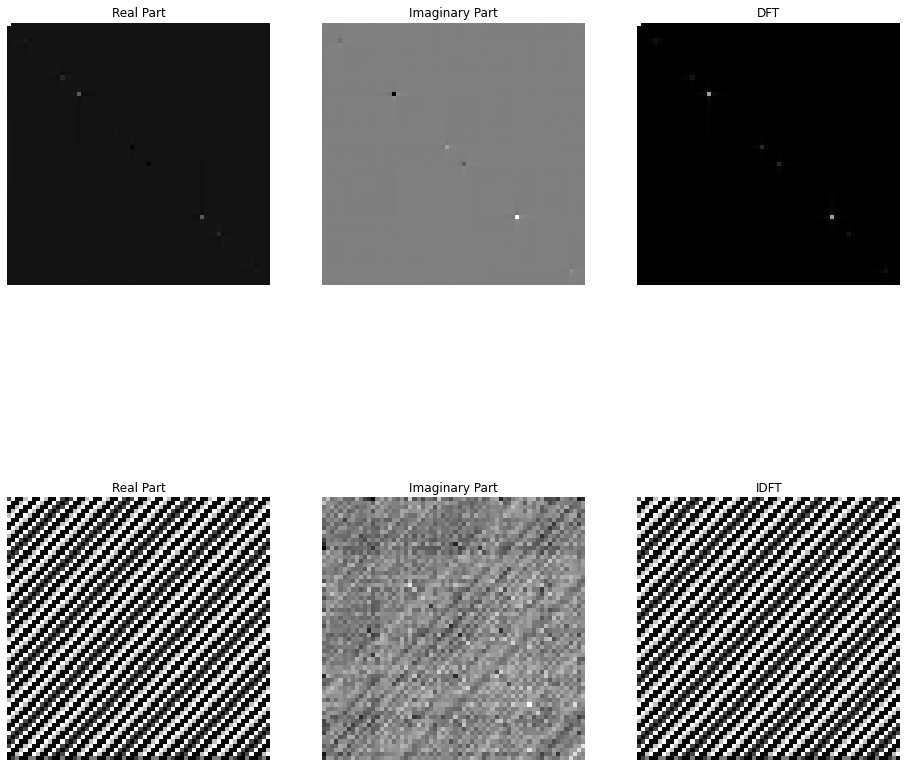

In [46]:
img=cv2.resize(stripe.img,(64,64))
dft = dft_2d(img)
idft = idft_2d(dft)
okay = np.sqrt(np.square(dft.real)+np.square(dft.imag))
iokay = np.sqrt(np.square(idft.real)+np.square(idft.imag))
dftsub=Subplot()
dftsub.print_img_subplot(2,3,[16,16],6,[dft.real,dft.imag,okay,idft.real,idft.imag,iokay],['Real Part','Imaginary Part',"DFT",'Real Part','Imaginary Part',"IDFT"])

## part 2

In [47]:
def fft_1d_op(arr):
    N = len(arr)
    wt = cmath.exp(-2j*math.pi/N)
    if N > 1:
        arr = fft_1d_op(arr[::2]) + fft_1d_op(arr[1::2])
        for k in range(0,N//2):
            tt = arr[k]
            arr[k] = tt + (wt**k)*arr[k+N//2]
            arr[k+N//2] = tt - (wt**k)*arr[k+N//2]
    return arr

def fft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        arr[i]=fft_1d_op(img[i].tolist())
    arr=arr.transpose()
    brr=np.zeros((img.shape[1],img.shape[0]),dtype=complex)
    for i in range(img.shape[1]):
        brr[i]=fft_1d_op(arr[i].tolist())
    arr=brr.transpose()
    return arr

def sqcmp(img):
    tt= (np.sqrt(np.square(img.real)+np.square(img.imag)))
    return tt.astype(np.uint8)

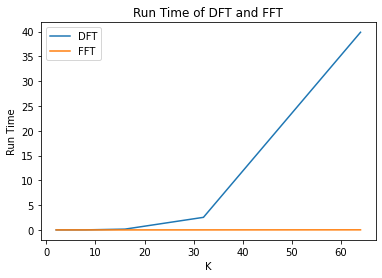

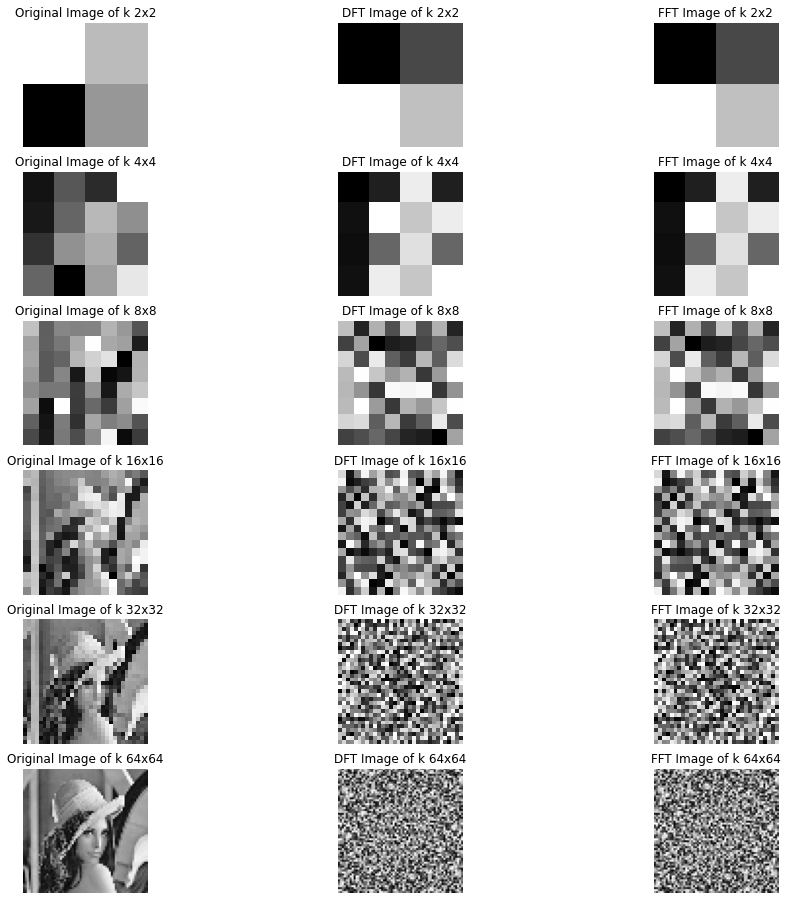

In [48]:
lena=Image()
lena.read_local_img("../images/lena.jpg")
lena.img=cv2.cvtColor(lena.img, cv2.COLOR_BGR2GRAY)

arr=[2,4,8,16,32,64]
aa=[]
bb=[]
ta=[]
tb=[]
for i in range(0,len(arr)):
    img=cv2.resize(lena.img,(arr[i],arr[i]))
    aa.append(img)
    bb.append("Original Image of k "+str(arr[i])+"x"+str(arr[i]))
    aaa=time.time()
    aa.append(sqcmp(dft_2d(img)))
    ta.append(time.time()-aaa)
    bb.append("DFT Image of k "+str(arr[i])+"x"+str(arr[i]))
    aaa=time.time()
    aa.append(sqcmp(fft_2d(img)))
    tb.append(time.time()-aaa)
    bb.append("FFT Image of k "+str(arr[i])+"x"+str(arr[i]))

plt.plot(arr,ta)
plt.plot(arr,tb)
plt.legend(['DFT','FFT'])
plt.xlabel('K')
plt.ylabel('Run Time')
plt.title('Run Time of DFT and FFT')
plt.show()

sub=Subplot()
sub.print_img_subplot(len(arr),3,[16,16],len(arr)*3,aa,bb)


## part 3


In [49]:
def ifft_1d(arr):
    N = len(arr)
    wt = cmath.exp(2j*math.pi/N)
    if N > 1:
        arr = ifft_1d(arr[::2]) + ifft_1d(arr[1::2])
        for k in range(0,N//2):
            tt = arr[k]
            arr[k] = tt + (wt**k)*arr[k+N//2]
            arr[k+N//2] = tt - (wt**k)*arr[k+N//2]
    return arr

def ifft_1d_op(arr):
    tt=ifft_1d(arr)
    for i in range(0,len(arr)):
        tt[i]=tt[i]/len(tt)
    return tt

def ifft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        arr[i]=ifft_1d(img[i].tolist())
    arr=arr.transpose()
    brr=np.zeros((img.shape[1],img.shape[0]),dtype=complex)
    for i in range(img.shape[1]):
        brr[i]=fft_1d_op(arr[i].tolist())
    arr=brr.transpose()
    brr=np.zeros((arr.shape[0],arr.shape[1]),dtype=complex)
    for i in range(arr.shape[0]):
        brr[arr.shape[0]-i-1]=arr[i]
    return brr




## part 4

In [50]:
def rot_img_helper(img):
    n=img.shape[0]
    m=img.shape[1]
    N=2*((n+1)//2)+n
    M=2*((m+1)//2)+m
    sn=(n+1)//2
    sm=(m+1)//2
    arr=np.zeros((N,M))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            arr[i+sn][j+sm]=img[i][j]
    return arr

def cleanup(img):
    arrr=[]
    for i in range(0,img.shape[0]):
        val=0
        for j in range(0,img.shape[1]):
            val+=img[i][j]
        if val>0:
            arrr.append(img[i])
    arrr=np.array(arrr)
    arr= []
    for j in range(arrr.shape[1]):
        val =0
        arrrr=[]
        for i in range(arrr.shape[0]):
            val+=arrr[i][j]
            arrrr.append(arrr[i][j])
        if val>0:
            arr.append(arrrr)
    arr=np.array(arr)
    arr=np.transpose(arr)
    return np.array(arr)

def rot_img(img,theta):
    img=rot_img_helper(img)
    cx=img.shape[0]//2
    cy=img.shape[1]//2
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            xxx=i-cx
            yyy=j-cy
            xx=xxx*math.cos(theta)-yyy*math.sin(theta)
            yy=xxx*math.sin(theta)+yyy*math.cos(theta)
            xx=math.floor(xx+cx)
            yy=math.floor(yy+cy)
            if(xx>=0 and xx<img.shape[0] and yy>=0 and yy<img.shape[1]):
                arr[xx][yy]=img[i][j]
    arr = cleanup(arr)
    return arr

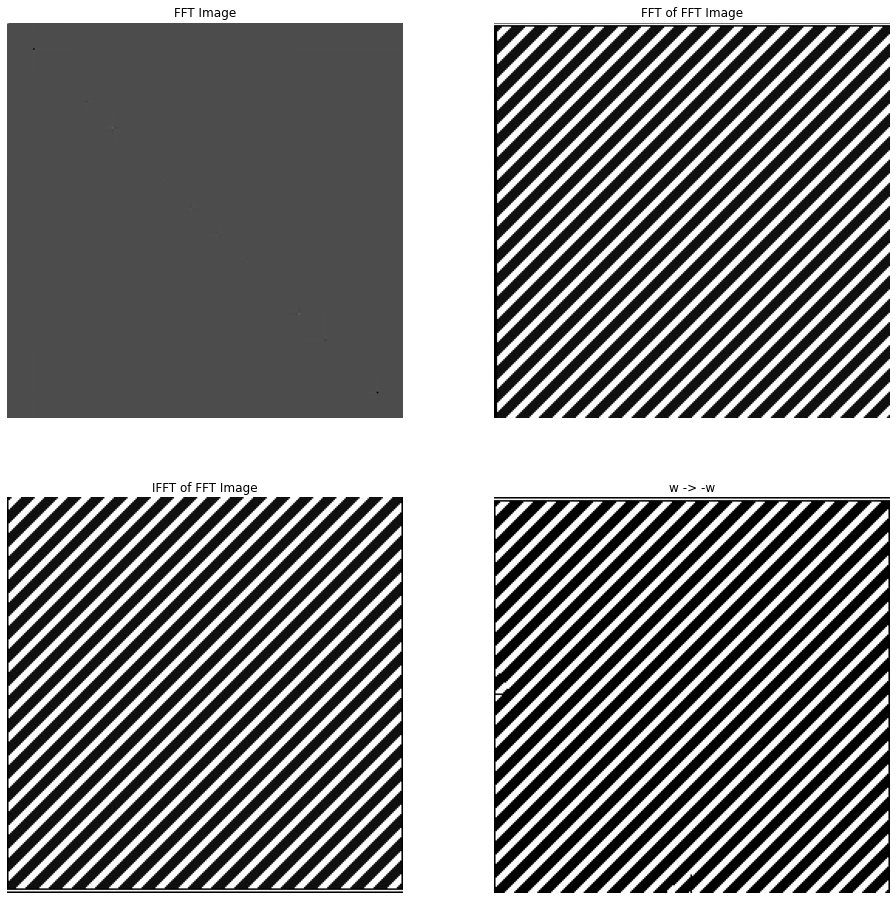

In [51]:
img=cv2.resize(stripe.img,(256,256))
img1=fft_2d(img)
img11=fft_2d(img1)
img2=ifft_2d(img1)
img3=rot_img(img2.real**2+img2.imag**2,math.pi)
sub=Subplot()
sub.print_img_subplot(2,2,[16,16],4,[img1.real,img11.real,img2.real,img3],["FFT Image","FFT of FFT Image","IFFT of FFT Image","w -> -w"])


+ ### F[F[f(x)]]=2πf(−x)
+ ### to obtain f(x) we can normaizle it by dividing by 2π and then taking reflection along origin or rotation image by 180 degree.


# Question 8

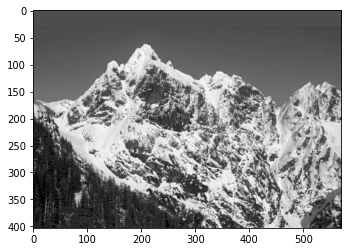

In [52]:
mountain=Image()
mountain.read_local_img("../images/mountain.png")
mountain.img=cv2.cvtColor(mountain.img, cv2.COLOR_BGR2GRAY)
plt.imshow(mountain.img,cmap='gray')
plt.show()


In [53]:
def dis(a,b,c,d):
    return math.sqrt((a-c)**2+(b-d)**2)

def dis2(a,b,c,d):
    return ((a-c)**2+(b-d)**2)

def hl_fil(d,n,m,x=-1,y=-1):
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    arr=np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            val=dis(i,j,x,y)
            if val<d:
                arr[i][j]=1
    return arr

def hh_fil(d,n,m,x=-1,y=-1):
    arr=np.zeros((n,m))
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    for i in range(0,n):
        for j in range(0,m):
            val=dis(i,j,x,y)
            if val>d:
                arr[i][j]=1
    return arr

def ghl_fil(d,n,m,x=-1,y=-1):
    arr=np.zeros((n,m))
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    arr=np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            val=math.exp(-1*dis2(i,j,x,y)/(2*d**2))
            arr[i][j]=val
    return arr

def ghh_fil(d,n,m,x=-1,y=-1):
    arr=np.zeros((n,m))
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    arr=np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            val=math.exp(-1*dis2(i,j,x,y)/(2*d**2))
            arr[i][j]=1-val
    return arr

def fftshift(img):
    n=img.shape[0]
    m=img.shape[1]
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,n):
        for j in range(0,m):
            arr[i][j]=img[(i+n//2)%n][(j+m//2)%m]
    return arr

def apply(img,fil,n,m,mag=False,ret=False):
    
    img=cv2.resize(img,(n,m))
    img=fftshift(fft_2d(img))
    if mag==True:
        magnitude_spectrum = 20 * np.log(cv2.magnitude(img.real, img.imag)+1)
        if ret==False:
            plt.imshow(magnitude_spectrum,cmap='gray')
            plt.show()
    img.real=img.real*fil
    img.imag=img.imag*fil
    if mag==True:
        magnitude_spectrum2 = 20 * np.log(cv2.magnitude(img.real, img.imag)+1)
        if ret==False:
            plt.imshow(magnitude_spectrum2,cmap='gray')
            plt.show()
    img=ifft_2d(fftshift(img))
    img.real=img.real/img.real.max()
    img.imag=img.imag/img.imag.max()
    img=(img.real**2+img.imag**2)**0.5
    if ret==True:
        return img.real,magnitude_spectrum,magnitude_spectrum2
    else :
        return img.real


## part 1

Low pass filter


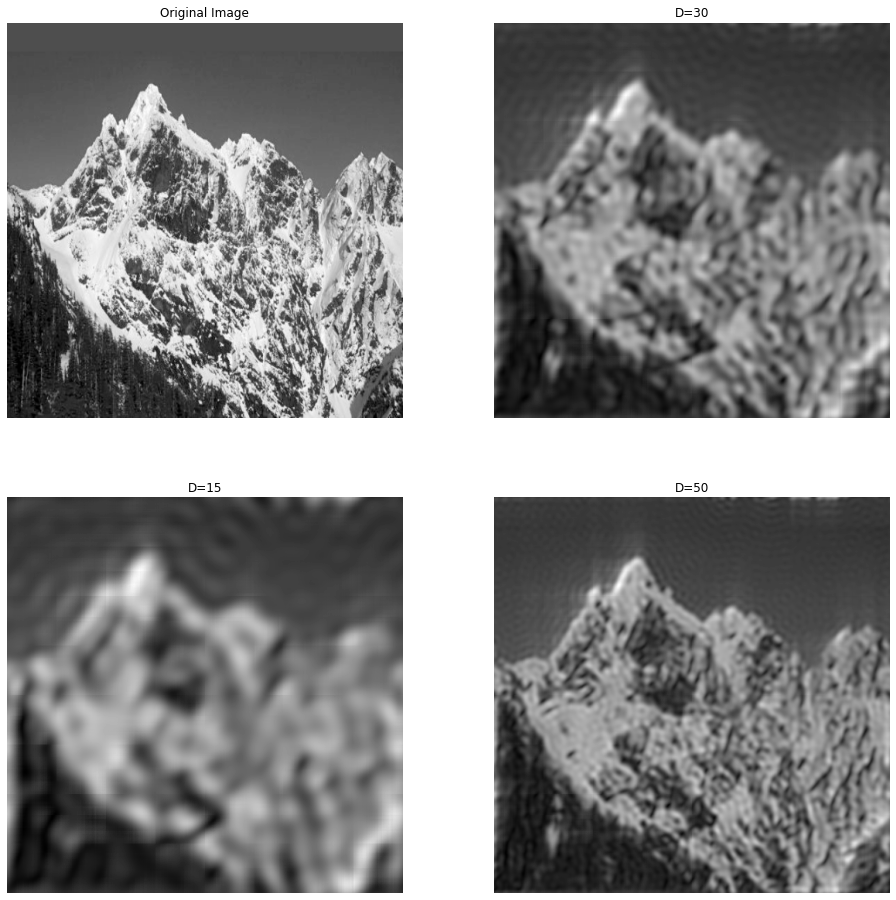

In [54]:
n=512
m=512
print("Low pass filter")
img=cv2.resize(mountain.img,(n,m))
img1=apply(img,hl_fil(30,n,m),n,m)
img2=apply(img,hl_fil(15,n,m),n,m)
img3=apply(img,hl_fil(50,n,m),n,m)
sub=Subplot()
sub.print_img_subplot(2,2,[16,16],4,[img,img1,img2,img3],["Original Image","D=30","D=15","D=50"])

## part 2

Gaussian Low pass filter


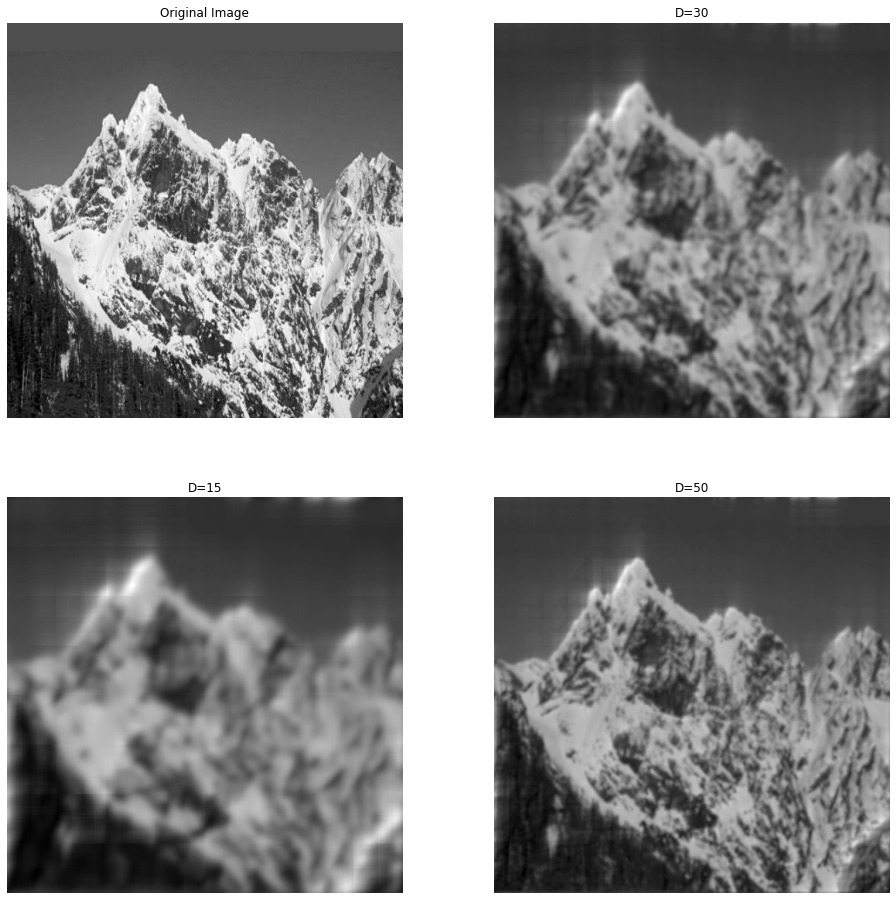

In [55]:
n=512
m=512
print("Gaussian Low pass filter")
img=cv2.resize(mountain.img,(n,m))
img1=apply(img,ghl_fil(30,n,m),n,m)
img2=apply(img,ghl_fil(15,n,m),n,m)
img3=apply(img,ghl_fil(50,n,m),n,m)
sub=Subplot()
sub.print_img_subplot(2,2,[16,16],4,[img,img1,img2,img3],["Original Image","D=30","D=15","D=50"])

## part 3

+ An ideal low pass filter will keep all spatial frequencies below a nominal spatial frequency, and remove all spatial frequencies above it. 

+ A Gaussian doesn't produce very sharp spatial frequency selectivity. Filtering with a Gaussian tends to look "natural" compared to ideal low pass filters, which can generate ringing artifacts.

+ However, which is better for your image largely depends on what you want to do. While there's significant theory behind it, qualitative choices like this in image processing are largely an art

# Question 9

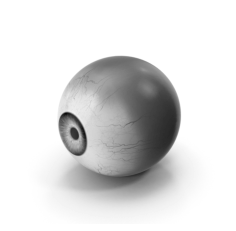

In [56]:
eye=Image()
eye.read_local_img("../images/eye.png")
eye.img=cv2.cvtColor(eye.img, cv2.COLOR_BGR2GRAY)
plt.imshow(eye.img,cmap='gray')
plt.axis('off')
plt.show()

In [57]:
def erossion(img,k,fil,aaa):
    kk=k//2
    if fil==-1:
        img=np.array(img)
        fil=np.zeros((k,k))
        fil.fill(1)
        fil=fil.astype(int)
    else:
        fil=aaa
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            arr[i][j]=img[i][j]
    for i in range(kk, img.shape[0]-kk):
        for j in range(kk,img.shape[1]-kk):
            arr1= img[i-kk:i+kk+1, j-kk:j+kk+1]
            arr1= arr1*fil
            arr[i,j]= np.min(arr1)
    return arr

def dilation(img,k,fil,aaa):
    kk=k//2
    if fil==-1:
        img=np.array(img)
        fil=np.zeros((k,k))
        fil.fill(1)
        fil=fil.astype(int)
    else:
        fil=aaa
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            arr[i][j]=img[i][j]
    for i in range(kk, img.shape[0]-kk):
        for j in range(kk,img.shape[1]-kk):
            arr1= img[i-kk:i+kk+1, j-kk:j+kk+1]
            arr1= arr1*fil
            arr[i,j]= np.max(arr1)
    return arr

def opening(img,k,fil,aaa):
    img=erossion(img,k,fil,aaa)
    img=dilation(img,k,fil,aaa)
    return img

def closing(img,k,fil,aaa):
    img=dilation(img,k,fil,aaa)
    img=erossion(img,k,fil,aaa)
    return img

def morphological_gradient(img,k,fil,aaa):
    img1=dilation(img,k,fil,aaa)
    img2=erossion(img,k,fil,aaa)
    return img1-img2

Morphological Gradient with square mask with all 1s


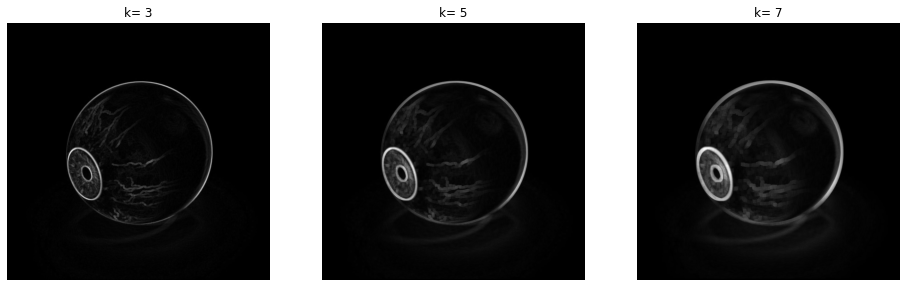

In [58]:
aa=[]
bb=[]
for i in range(0,3):
    img=morphological_gradient(eye.img,i+i+3,-1,[])
    aa.append(img)
    bb.append("k= "+str(i+i+3))
morph=Subplot()
print("Morphological Gradient with square mask with all 1s")
morph.print_img_subplot(1,3,[16,16],3,aa,bb)

+ ### to find morphological gradient i subbtracted image after dilation and image after erosion both with same kernal.
+ ### as kernel size increases, the edged image becomes more blurred.

# Question 10


## part 1

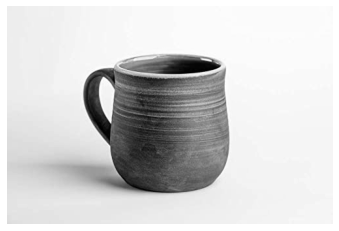

In [59]:
cup=Image()
cup.read_local_img("../images/cup.jpg")
cup.img=cv2.cvtColor(cup.img, cv2.COLOR_BGR2GRAY)
plt.imshow(cup.img,cmap='gray')
plt.axis('off')
plt.show()

In [60]:
def rot_img_helper(img):
    n=img.shape[0]
    m=img.shape[1]
    N=2*((n+1)//2)+n
    M=2*((m+1)//2)+m
    sn=(n+1)//2
    sm=(m+1)//2
    arr=np.zeros((N,M))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            arr[i+sn][j+sm]=img[i][j]
    return arr

def cleanup(img):
    arrr=[]
    for i in range(0,img.shape[0]):
        val=0
        for j in range(0,img.shape[1]):
            val+=img[i][j]
        if val>0:
            arrr.append(img[i])
    arrr=np.array(arrr)
    arr= []
    for j in range(arrr.shape[1]):
        val =0
        arrrr=[]
        for i in range(arrr.shape[0]):
            val+=arrr[i][j]
            arrrr.append(arrr[i][j])
        if val>0:
            arr.append(arrrr)
    arr=np.array(arr)
    arr=np.transpose(arr)
    return np.array(arr)

def rot_img(img,theta):
    img=rot_img_helper(img)
    cx=img.shape[0]//2
    cy=img.shape[1]//2
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            xxx=i-cx
            yyy=j-cy
            xx=xxx*math.cos(theta)-yyy*math.sin(theta)
            yy=xxx*math.sin(theta)+yyy*math.cos(theta)
            xx=math.floor(xx+cx)
            yy=math.floor(yy+cy)
            if(xx>=0 and xx<img.shape[0] and yy>=0 and yy<img.shape[1]):
                arr[xx][yy]=img[i][j]
    arr = cleanup(arr)
    return arr

def rot_img2(img,theta):
    img=rot_img_helper(img)
    cx=img.shape[0]//2
    cy=img.shape[1]//2
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            xxx=i-cx
            yyy=j-cy
            xx=xxx*math.cos(theta)+yyy*math.sin(theta)
            yy=-xxx*math.sin(theta)+yyy*math.cos(theta)
            xx=math.floor(xx+cx)
            yy=math.floor(yy+cy)
            if(xx>=0 and xx<img.shape[0] and yy>=0 and yy<img.shape[1]):
                arr[i][j]=img[xx][yy]
    arr = cleanup(arr)
    return arr

## part 2

With holes


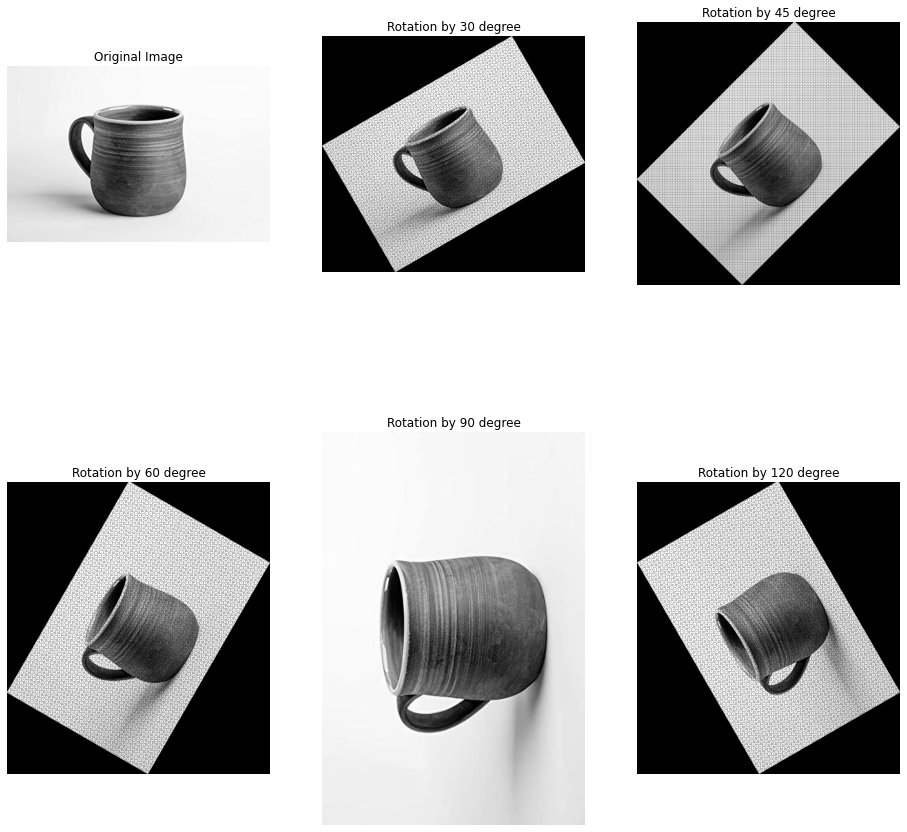

In [61]:
print("With holes")
aa=[]
bb=["Original Image","Rotation by 30 degree","Rotation by 45 degree","Rotation by 60 degree","Rotation by 90 degree","Rotation by 120 degree"]
cc=[math.pi/6,math.pi/4,math.pi/3,math.pi/2,2*math.pi/3]
aa.append(cup.img)
for i in range(len(cc)):
    aa.append(rot_img(cup.img,cc[i]))
rot=Subplot()
rot.print_img_subplot(2,3,[16,16],6,aa,bb)


Without holes


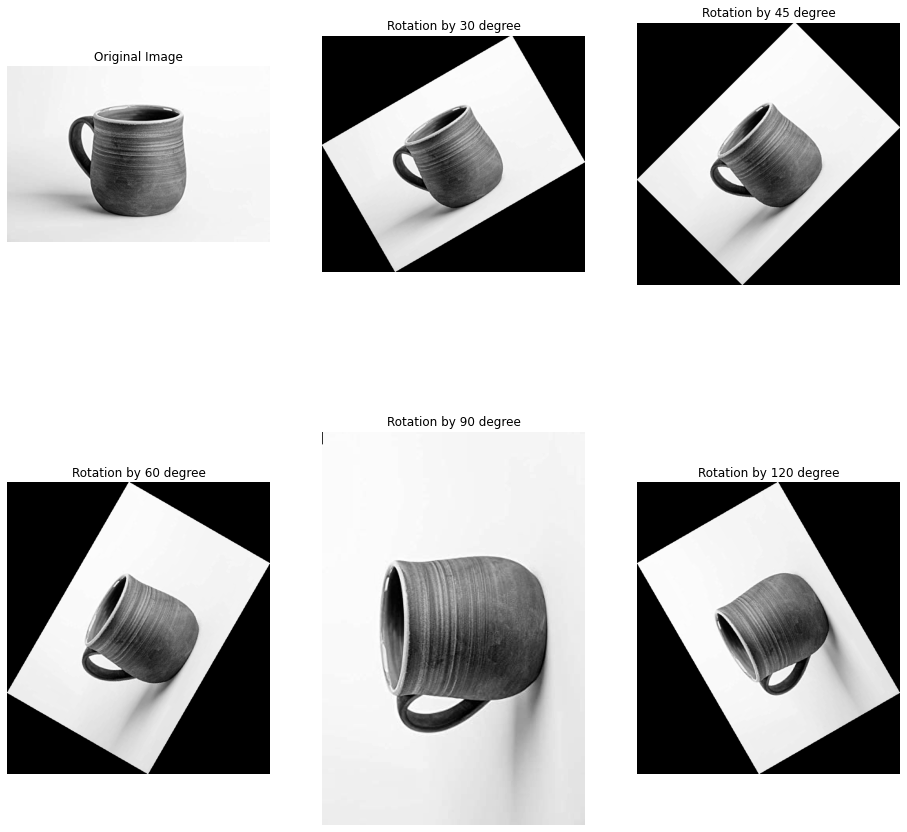

In [62]:
print("Without holes")
aa=[]
bb=["Original Image","Rotation by 30 degree","Rotation by 45 degree","Rotation by 60 degree","Rotation by 90 degree","Rotation by 120 degree"]
cc=[math.pi/6,math.pi/4,math.pi/3,math.pi/2,2*math.pi/3]
aa.append(cup.img)
for i in range(len(cc)):
    aa.append(rot_img2(cup.img,cc[i]))
rot=Subplot()
rot.print_img_subplot(2,3,[16,16],6,aa,bb)


# Question 11

In [63]:
def magic(ker,img):
    arr=np.zeros
    k=len(ker)
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            val=0
            for m in range(0,k):
                for n in range(0,k):
                    if(i+m-1>=0 and i+m-1<img.shape[0] and j+n-1>=0 and j+n-1<img.shape[1]):
                        val+=(img[i+m-1][j+n-1]*ker[m][n])
                    else:
                        val+=0
            if(val>255):
                val=255
            elif(val<0):
                val=0
            arr[i][j]=val
    return arr

def unsharp(img,k,fs):
    img_copy=np.zeros(img.shape).astype(np.uint8)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            img_copy[i][j]=img[i][j]
    fil=np.zeros((fs,fs))
    fil.fill(-1)
    fil[fs//2][fs//2]=fs*fs-1
    fil=fil.astype(np.int8)
    blr_img=magic(fil,img_copy)
    arr = (k+1)*img + k*blr_img
    return arr

def high_boost(img,wt,k,fs):
    fil=np.zeros((fs,fs))
    fil.fill(-1)
    fil[fs//2][fs//2]=fs*fs*wt-1
    fil=fil.astype(np.int8)
    return unsharp(img,k,fs)

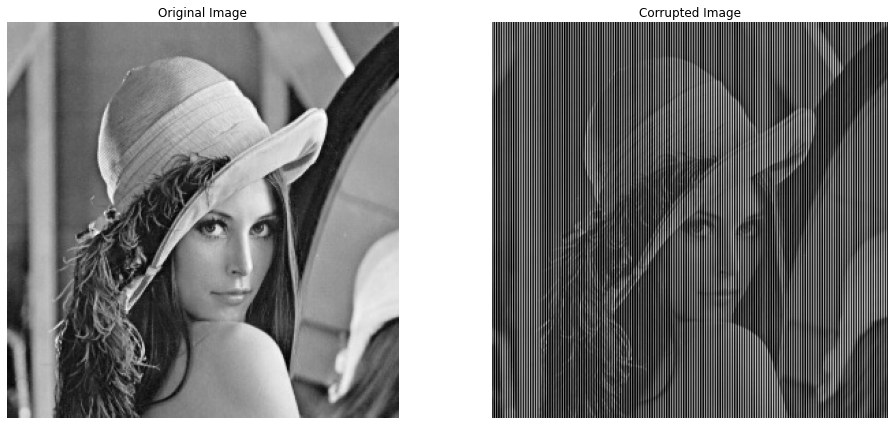

In [64]:
lena=Image()
lena.read_local_img("../images/lena.jpg")
lena.img=cv2.cvtColor(lena.img, cv2.COLOR_BGR2GRAY)

clena=Image()
clena.read_local_img("../images/corruptedLena.jpg")
clena.img=cv2.cvtColor(clena.img, cv2.COLOR_BGR2GRAY)

Lena=Subplot()
Lena.print_img_subplot(2,2,[16,16],2,[lena.img,clena.img],["Original Image","Corrupted Image"])


In [65]:
sss=512
img=cv2.resize(clena.img,(sss,sss))
imgo=cv2.resize(lena.img,(sss,sss))
arrr=np.zeros((img.shape[0],img.shape[1]))
arrr.fill(1)
restore=[]
for i in range(10):
    restore.append(arrr)

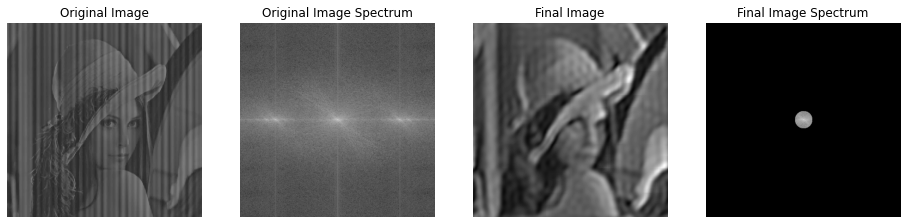

In [66]:
img21,pl1,pl2=apply(img,hl_fil(23,sss,sss),sss,sss,True,True)
restore[0]=img21
sub=Subplot()
sub.print_img_subplot(1,4,[16,16],4,[img,pl1,img21,pl2],["Original Image","Original Image Spectrum","Final Image","Final Image Spectrum"])

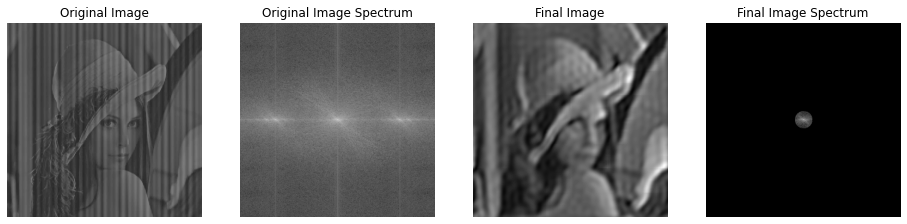

In [67]:
def hhh_fil22(d,n,m,a,b):
    arr=np.zeros((n,m))
    arr.fill(1)
    for i in range(0,n):
        for j in range(0,m):
            val=dis(i,j,n//2,m//2)
            val5=dis(i,j,n//2,m//2+a)
            val6=dis(i,j,n//2,m//2+b)
            if  val5>d and val6>d :
                arr[i][j]=0
    for i in range(0,n//2):
        for j in range(0,m//2):
            arr[i][j]=1-math.exp((-1.0*(i**2+j**2))/(2*d*d))
    for i in range(0,n//2):
        for j in range(m//2,m):
            arr[i][j]=1-math.exp((-1.0*(i**2+(j-m)**2))/(2*d*d))
    for i in range(n//2,n):
        for j in range(0,m//2):
            arr[i][j]=1-math.exp((-1.0*((n-i)**2+j**2))/(2*d*d))
    for i in range(n//2,n):
        for j in range(m//2,m):
            arr[i][j]=1-math.exp((-1.0*((n-i)**2+(j-m)**2))/(2*d*d))
    bbb=hl_fil(23,n,m)
    return arr*bbb

img22,pl1,pl2=apply(img,hhh_fil22(10000,sss,sss,165,-165),sss,sss,True,True)
restore[1]=img21
sub=Subplot()
sub.print_img_subplot(1,4,[16,16],4,[img,pl1,img22,pl2],["Original Image","Original Image Spectrum","Final Image","Final Image Spectrum"])

In [68]:
def apply2(img,fil,n,m,mag=False):
    img=cv2.resize(img,(n,m))
    img=(fft_2d(img)*fil)
    img=ifft_2d(img)
    img.real=img.real/img.real.max()
    img.imag=img.imag/img.imag.max()
    # img=(img.real**2+img.imag**2)**0.5
    return img.real

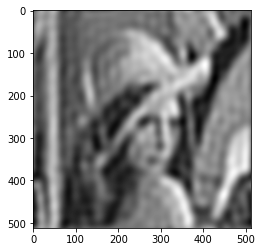

In [69]:
img31=apply2(img,hh_fil(347,sss,sss),sss,sss,True)
restore[2]=img31
plt.imshow(img31,cmap='gray')
plt.show()

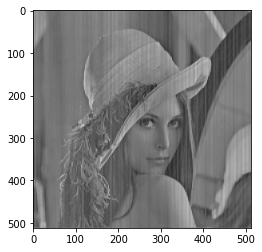

In [70]:
img41=apply2(img,hh_fil(350,512,512,100),512,512)
restore[3]=img41
plt.imshow(img41,cmap='gray')
plt.show()

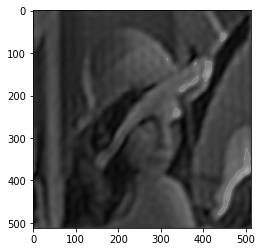

In [71]:
img51=high_boost(img22,3,0.1,3)
restore[4]=img51
plt.imshow(img51,cmap="gray")
plt.show()

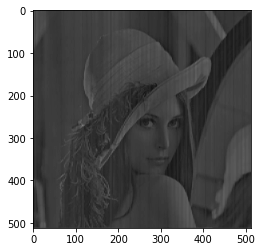

In [72]:
img61=high_boost(img41,1,0.1,5)
restore[5]=img61
plt.imshow(img61,cmap="gray")
plt.show()

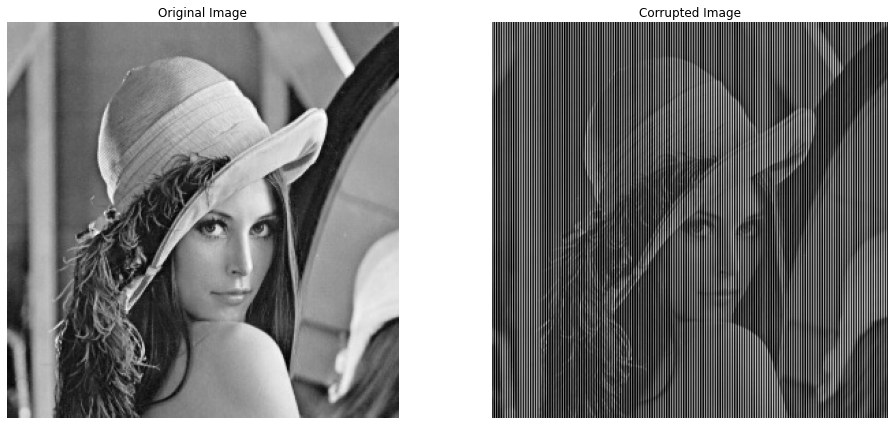

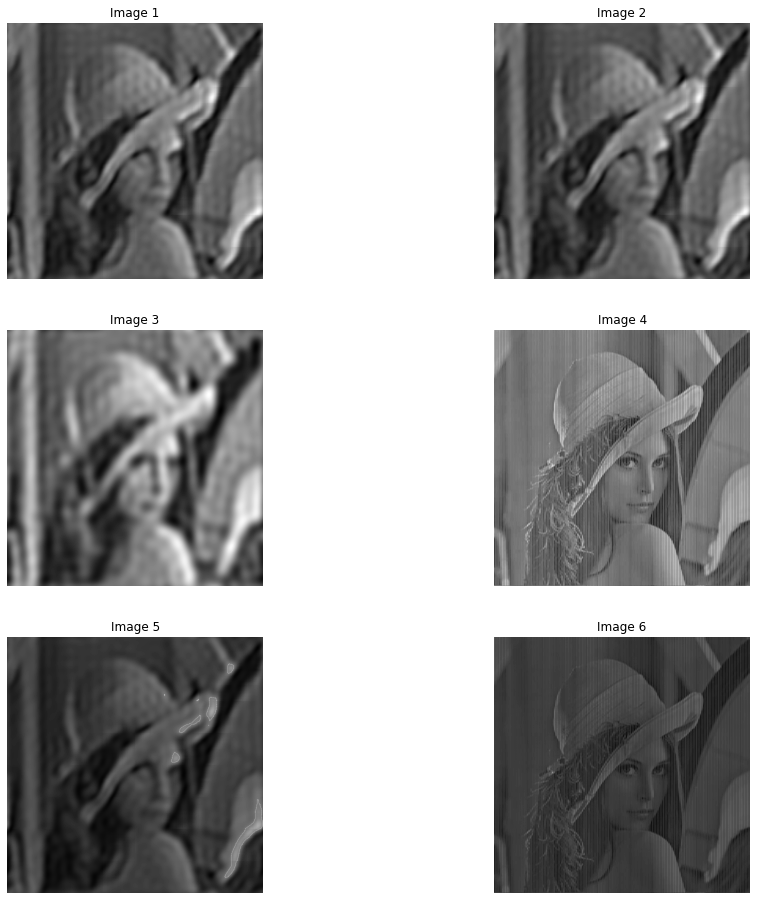

In [73]:
sub=Subplot()
Lena.print_img_subplot(2,2,[16,16],2,[lena.img,clena.img],["Original Image","Corrupted Image"])
sub.print_img_subplot(3,2,[16,16],6,restore,["Image 1","Image 2","Image 3","Image 4","Image 5","Image 6"])

In [74]:
def hhh_fil(d,n,m,a,b):
    arr=np.zeros((n,m))
    arr.fill(1)
    for i in range(0,n):
        for j in range(0,m):
            val=dis(i,j,n//2,m//2)
            val1=dis(i,j,0-a,0-b)
            val2=dis(i,j,n+a,0-b)
            val3=dis(i,j,0-a,m+b)
            val4=dis(i,j,n+a,m+b)
            val5=dis(i,j,n//2,m//2+a)
            val6=dis(i,j,n//2,m//2+b)
            if  val5>d and val6>d :
                arr[i][j]=0
    for i in range(0,n//2):
        for j in range(0,m//2):
            arr[i][j]=1-math.exp((-1.0*(i**2+j**2))/(2*d*d))
    for i in range(0,n//2):
        for j in range(m//2,m):
            arr[i][j]=1-math.exp((-1.0*(i**2+(j-m)**2))/(2*d*d))
    for i in range(n//2,n):
        for j in range(0,m//2):
            arr[i][j]=1-math.exp((-1.0*((n-i)**2+j**2))/(2*d*d))
    for i in range(n//2,n):
        for j in range(m//2,m):
            arr[i][j]=1-math.exp((-1.0*((n-i)**2+(j-m)**2))/(2*d*d))
    bbb=hl_fil(29,n,m)
    for j in range(m):
        for i in range(0,250):
            arr[i][j]=0
            arr[511-i][j]=0
    for i in range(n):
        for j in range(160):
            arr[i][j]=0
            arr[i][511-j]=0
    return arr*bbb